<a href="https://colab.research.google.com/github/M-G-C-64/Verzeo/blob/Minor/Quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
wq = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Quality_of_Wine/winequality-red.csv')

In [8]:
wq.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
274,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5
1522,6.1,0.32,0.25,2.3,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,5
85,6.9,0.55,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,5
1307,6.8,0.68,0.09,3.9,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4
448,8.6,0.53,0.22,2.0,0.100,7.0,27.0,0.99670,3.20,0.56,10.2,6


In [22]:
wq.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


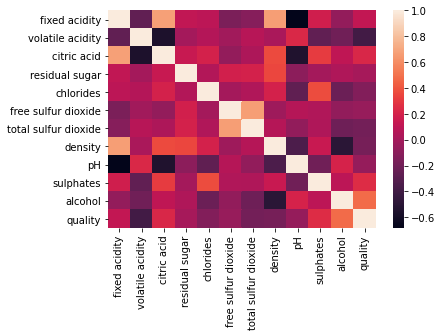

In [9]:
sns.heatmap(wq.corr())

Alcohol, sulphates, volatile acidity, cirtic acid are the higly correlated to the quality

# Considering Alcohol column alone

In [10]:
x_alc = wq['alcohol'].values.reshape(-1,1)
y = wq['quality'].values

In [48]:
temp = np.ndarray(1599)
for i in range(1599):
    temp[i] = i

### **Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [16]:
Log.fit(x_alc, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_log = Log.predict(x_alc)

In [18]:
y_pred_log

array([5, 5, 5, ..., 6, 5, 6])

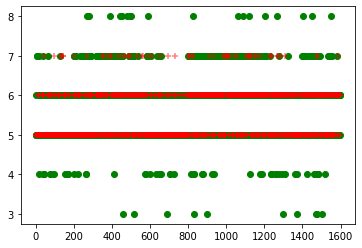

In [131]:
plt.scatter(temp, y, color = 'green')
plt.scatter(temp, y_pred_log, color = 'red', alpha=0.5, marker='+')

In [21]:
mae(y_pred_log, y)

0.49530956848030017

*error between original quality and predicted quality is 0.4953 if we only consider the alcohol*

In [133]:
accuracy_score(y_pred_log, y)

0.5572232645403377

*accuracy if we consider only alcohol is 55.722%*

#Considering Multiple columns

In [202]:
wq.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [72]:
x = wq.iloc[:, [1,2,9,10]].values
x.shape

(1599, 4)

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)

Standardising the x-values

In [192]:
ss = StandardScaler()

In [193]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [194]:
Log2 = LogisticRegression()

In [195]:
Log2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
y_pred_log2 = Log2.predict(x_test)
y_pred_log2_tot = Log2.predict(x)

In [197]:
print(mae(y_test, y_pred_log2))

0.43125


*error between original quality and predicted quality is* **0.43125**

In [198]:
accuracy_score(y_test, y_pred_log2)

0.6041666666666666

*accuracy if we consider 4 columns is* **60.024%**

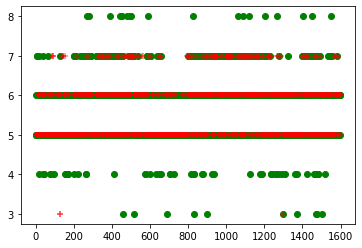

In [128]:
plt.scatter(temp, y, color = 'green')
plt.scatter(temp, y_pred_log2_tot, color = 'red', alpha = 0.5, marker='+')

In [201]:
confusion_matrix(y_test, y_pred_log2)

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,  11,   4,   0,   0],
       [  0,   0, 158,  48,   2,   0],
       [  0,   0,  64, 117,  23,   0],
       [  0,   0,   5,  25,  15,   0],
       [  0,   0,   0,   3,   2,   0]])

In [204]:
Log2.predict(ss.transform([[0.25, 0.36, 1.02, 10]]))

array([8])